# Example of pole placement for control of power-plant reservoir
We have plant model
$$ H(z) = \frac{1}{z(z-1)} $$
and controller
$$ F_b(z) = \frac{s_0z + s_1}{z + r_1} $$
Want closed-loop poles in $z=a$ and observer pole in the range $0<\alpha<a$.
### Diophantine equation
\begin{align}
  z(z-1)(z+r_1) + s_0z + s_1 &= (z-\alpha)(z-a)^2\\
  z^3 - (1-r_1)z^2 + (s_0-r_1)z + s_1 &= z^3 - 2az^2 + a^2z - \alphaz^2 + 2a\alphaz - a^2\alpha\\
  z^3 - (1-r_1)z^2 + (s_0-r_1)z + s_1 &= z^3 - (2a + alpha)z^2 + (a^2+2a\alpha)z - a^2\alpha
\end{align}
Resulting equations when setting coefficients equal
\begin{align}
  1 - r_ 1 &= 2a+\alpha \quad \Rightarrow \quad r_1 = 1-2a-\alpha\\
  s_0-r_1 &= a^2+2a\alpha \quad \Rightarrow \quad s_0 = r_1 + a^2 + 2a\alpha = 1-2a-\alpha+ a^2 + 2a\alpha\\
  s_1 &= -a^2\alpha
\end{align}

### Feedforward part of controller
$$T(z) = t_0A_o(z) = t_0z$$
$$ G_c(z) = \frac{T(z)B(z)}{A_o(z)A_c(z)} = \frac{t_0 B(z)}{A_c(z)}, \quad \text{want}\, G_c(1)=1$$
$$t_0 = \frac{A_c(1)}{B(1)} = \frac{(1-a)^2}{1}1$$



In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import control.matlab as cm
import ipywidgets as widgets
%matplotlib widget

## Symbolic solution

In [31]:
sy.init_printing()
aa, alphaa, hh, r1, s0, s1 = sy.symbols('a, alpha, h, r1, s0, s1', 
                                        real=True)
zz = sy.symbols('z', real=False)

In [32]:
A = zz*(zz-1)
B = 1
R = zz+r1
S = s0*zz + s1
LHS = sy.Poly(A*R + B*S, zz)
LHS

In [33]:
RHS = sy.Poly((zz-alphaa)*(zz-aa)**2, zz)
Dioph = LHS-RHS
coeffs = Dioph.all_coeffs()
coeffs

In [34]:
sy.solve(coeffs, [r1,s0, s1])

In [35]:
sol = sy.solve_undetermined_coeffs(sy.Eq(LHS, RHS), [r1, s0,s1], zz)
sol

## Effect of observer pole

<IPython.core.display.Javascript object>


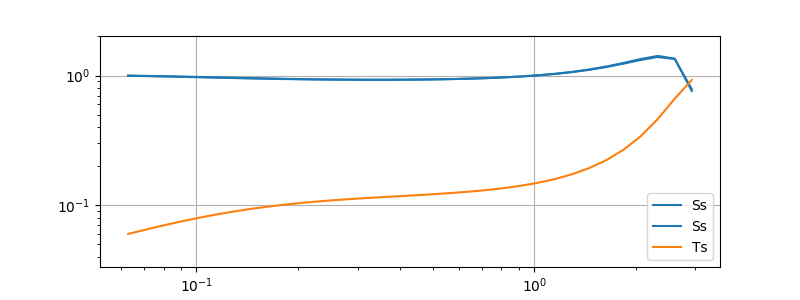

interactive(children=(FloatSlider(value=0.4, description='alpha', max=0.9, step=0.02), Output()), _dom_classes…

In [45]:
h = 1
# The plant
H = cm.tf([1], [1, 1, 0], h)
a = 0.9

# set up plot
fig, ax = plt.subplots(figsize=(8, 3))
#ax.set_ylim([-.1, 4])
ax.grid(True)

def bode_S_and_T(alpha):
    """
    Returns the bode plot data for S and T given observer pole
    """
    r1 = -2*a-alpha+1
    s0 = a**2 + 2*a*alpha - 2*a -alpha +1
    s1 = -a**2*alpha
    
    Fb = cm.tf([s0, s1], [1, r1], h)
    #Ff = (1-a)**2 * cm.tf([1, -alpha], [1, r1], h)
    #Gc = Ff * feedback(G, Fb)
    Ss = cm.feedback(1, H*Fb)
    Ts = cm.feedback(H*Fb, 1)

    Sbode = cm.bode(Ss, omega_limits=[0.01, 3],Plot=False)
    Tbode = cm.bode(Ts, omega_limits=[0.01,3],Plot=False)
    
    return (Sbode, Tbode)
    
 
@widgets.interact(alpha=(0, a, 0.02))
def update(alpha = 0.4):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    Sb, Tb = bode_S_and_T(alpha)
    sh = ax.loglog(Sb[2], Sb[0], color='C0', label='Ss')
    th = ax.loglog(Tb[2], Tb[0], color='C1', label='Ts')
    ax.legend()
    #ax.plot(yd[1], yd[0], color='C1')


In [48]:
t0 = (1-alpha)**2/1
Ff = cm.tf([t0, 0], [1, r_1], h)

In [49]:
# Check calculations
Hc = cm.minreal(Ff*cm.feedback(H, Fb))
cm.pole(Hc)

2 states have been removed from the model


array([0.9+4.59345062e-08j, 0.9-4.59345062e-08j])

In [50]:
Hcv = cm.feedback(1, H*Fb)
Hcn = cm.feedback(H*Fb, 1)

<IPython.core.display.Javascript object>


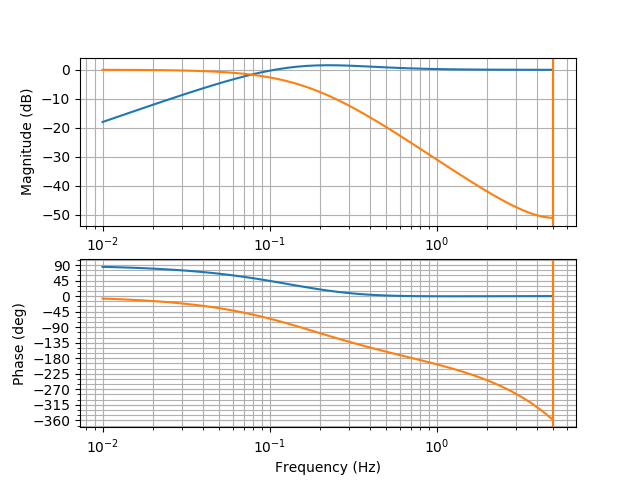

In [51]:
br, res = cm.rlocus(Fb*H)
plt.plot(np.real(br), np.imag(br))
plt.xlim((0,1.2))
plt.ylim((-1.2,1.2));

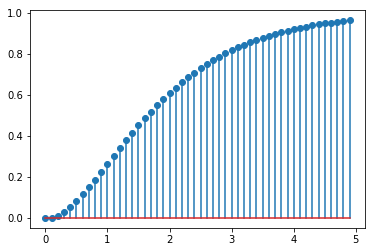

In [39]:
y, t = cm.step(Hc)
tt = h*np.arange(len(y))
plt.stem(tt[:50], y[:50]);

In [52]:
cm.bode(Hcv, Hcn);